In [ ]:
# conda install tensorflow=1.15

In [1]:
import COVA
import numpy as np
from scipy.io import loadmat
from sklearn import preprocessing
import matplotlib.pyplot as plt

First, we load the data. This data contains $n=1000$ points belonging to $c=7$ cohorts. The coordinates of the data points are stored in the matrix $Data$. The cohort membership of each data point is stored in $label$.

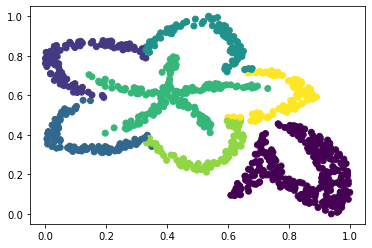

In [2]:
fullData = loadmat('../Data/OneFlower.mat')
scaler = preprocessing.MinMaxScaler()
# x = csr_matrix(fullData.get('newsdata')).toarray()
scaler.fit(np.array(fullData.get('g')))
Data = scaler.transform(np.array(fullData.get('g')))
label = np.array(fullData.get('label')).astype(int)


plt.scatter(Data[:, 0], Data[:, 1], c=label)
plt.show()

Next, we estimate the distance between any two data cohorts, and store the estimated distances in the matrix $Dc$.

Taking $Dc$ as the input, we use an isometric embedding algorithm to generate $c=7$ cohort prototypes (one for each cohort), so that the Euclidean distances between two prototypes preserve the between-cohort distance values in  $Dc$. The computed prototype embeddings are stored in the matrix $V$. Here, the motivation of applying an isometric embedding algorithm for cohorts rather than individual points is that  an algorithm of this type, e.g., multi-dimensional embedding and ordinal embedding, has better chance to succeed when handling a small number of instances.

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 38
         Function evaluations: 48
         Gradient evaluations: 48


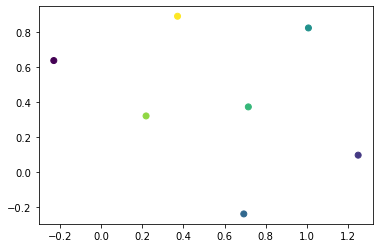

In [11]:
Dc = COVA.CohortDistance(Data, label)

V = COVA.PrototypeEmbedding(Dc, label, Embedding='MDS')
# V = COVA.PrototypeEmbedding(Dc, label, Embedding='SOE')
labelV = np.unique(label)

plt.scatter(V[:, 0], V[:, 1], c=labelV)
plt.show()

Now, we look at  the neighbouring relations between individual points. We compute an adjacency matrix $Ad$ between the $n=1000$ points, of which the $ij$th entry is set as zero if the $i$th and $j$th data points are not among the $k=10$ nearest neighbours of each other. 

Next, we look at the relations between  data points and data cohorts. We compute a cohort membership  confidence matrix $R$. Its $ij$th element corresponds to  a confidence value that the $i$th data point is from the $j$th data cohort.

Finally, taking the cohort prototypes $V$, between-point adjacency matrix $Ad$ and the cohort membership matrix $R$, as the input, COVA embeds the data points in the new space around the cohort prototypes, preserving information in $Ad$ and $R$ by solving a weighted sum objective function. The embedded data points are stored in the matrix $Result$. We display the embedded data points.

The parameter opttype can be chosen between **direct** and **manopt**. **manopt** only works for cova1 type. It could only successfully compile with TensorFlow 1.15 or below. 

         Current function value: 0.002251
         Iterations: 50
         Function evaluations: 57
         Gradient evaluations: 57


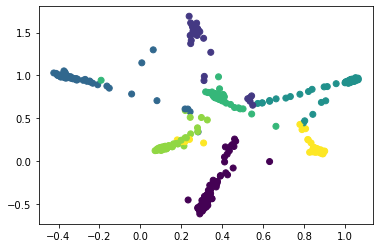

In [10]:
Ad = COVA.AdjacencyMatrix(Data)
# display Ad by using block

R = COVA.CohortConfidence(Data, label, lamb = 0)

Result = COVA.COVAembedding(Data, R, Ad, V, Init=0, dim=2, alpha=0.5, COVAType='cova1', opttype='direct')

plt.scatter(Result[:, 0], Result[:, 1], c=label)
plt.show()

# evaluation
# change symbol

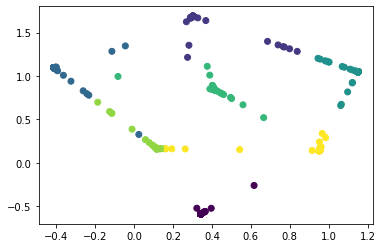

In [7]:
Result = COVA.COVAembedding(Data, Relation, Ad, V, Init=0, dim=2, alpha=0.9, COVAType='analyze')

plt.scatter(Result[:, 0], Result[:, 1], c=label)
plt.show()